In [38]:
#Adithya Momidi 21BCE4002
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [19]:
#2
df=pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<ipython-input-47-0e23eb6999b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

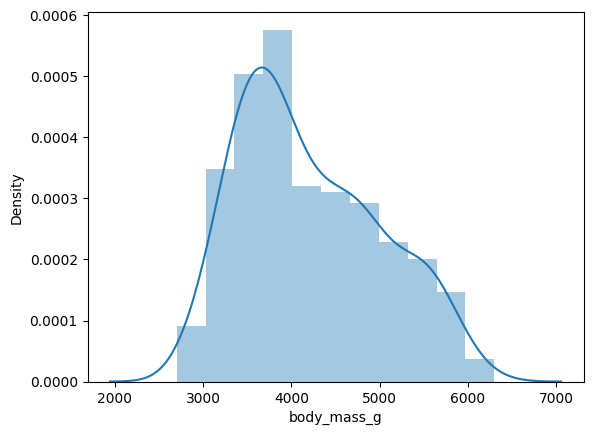

In [47]:
#3a
sns.distplot(df['body_mass_g'])

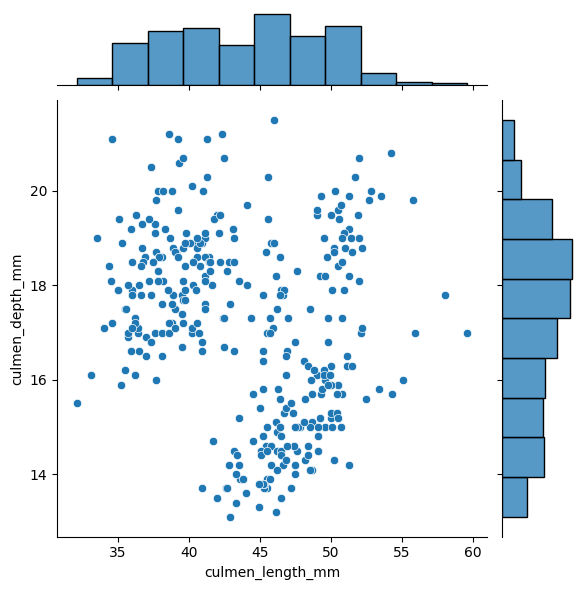

In [44]:
#3b
sns.jointplot(x='culmen_length_mm', y='culmen_depth_mm',data=df)

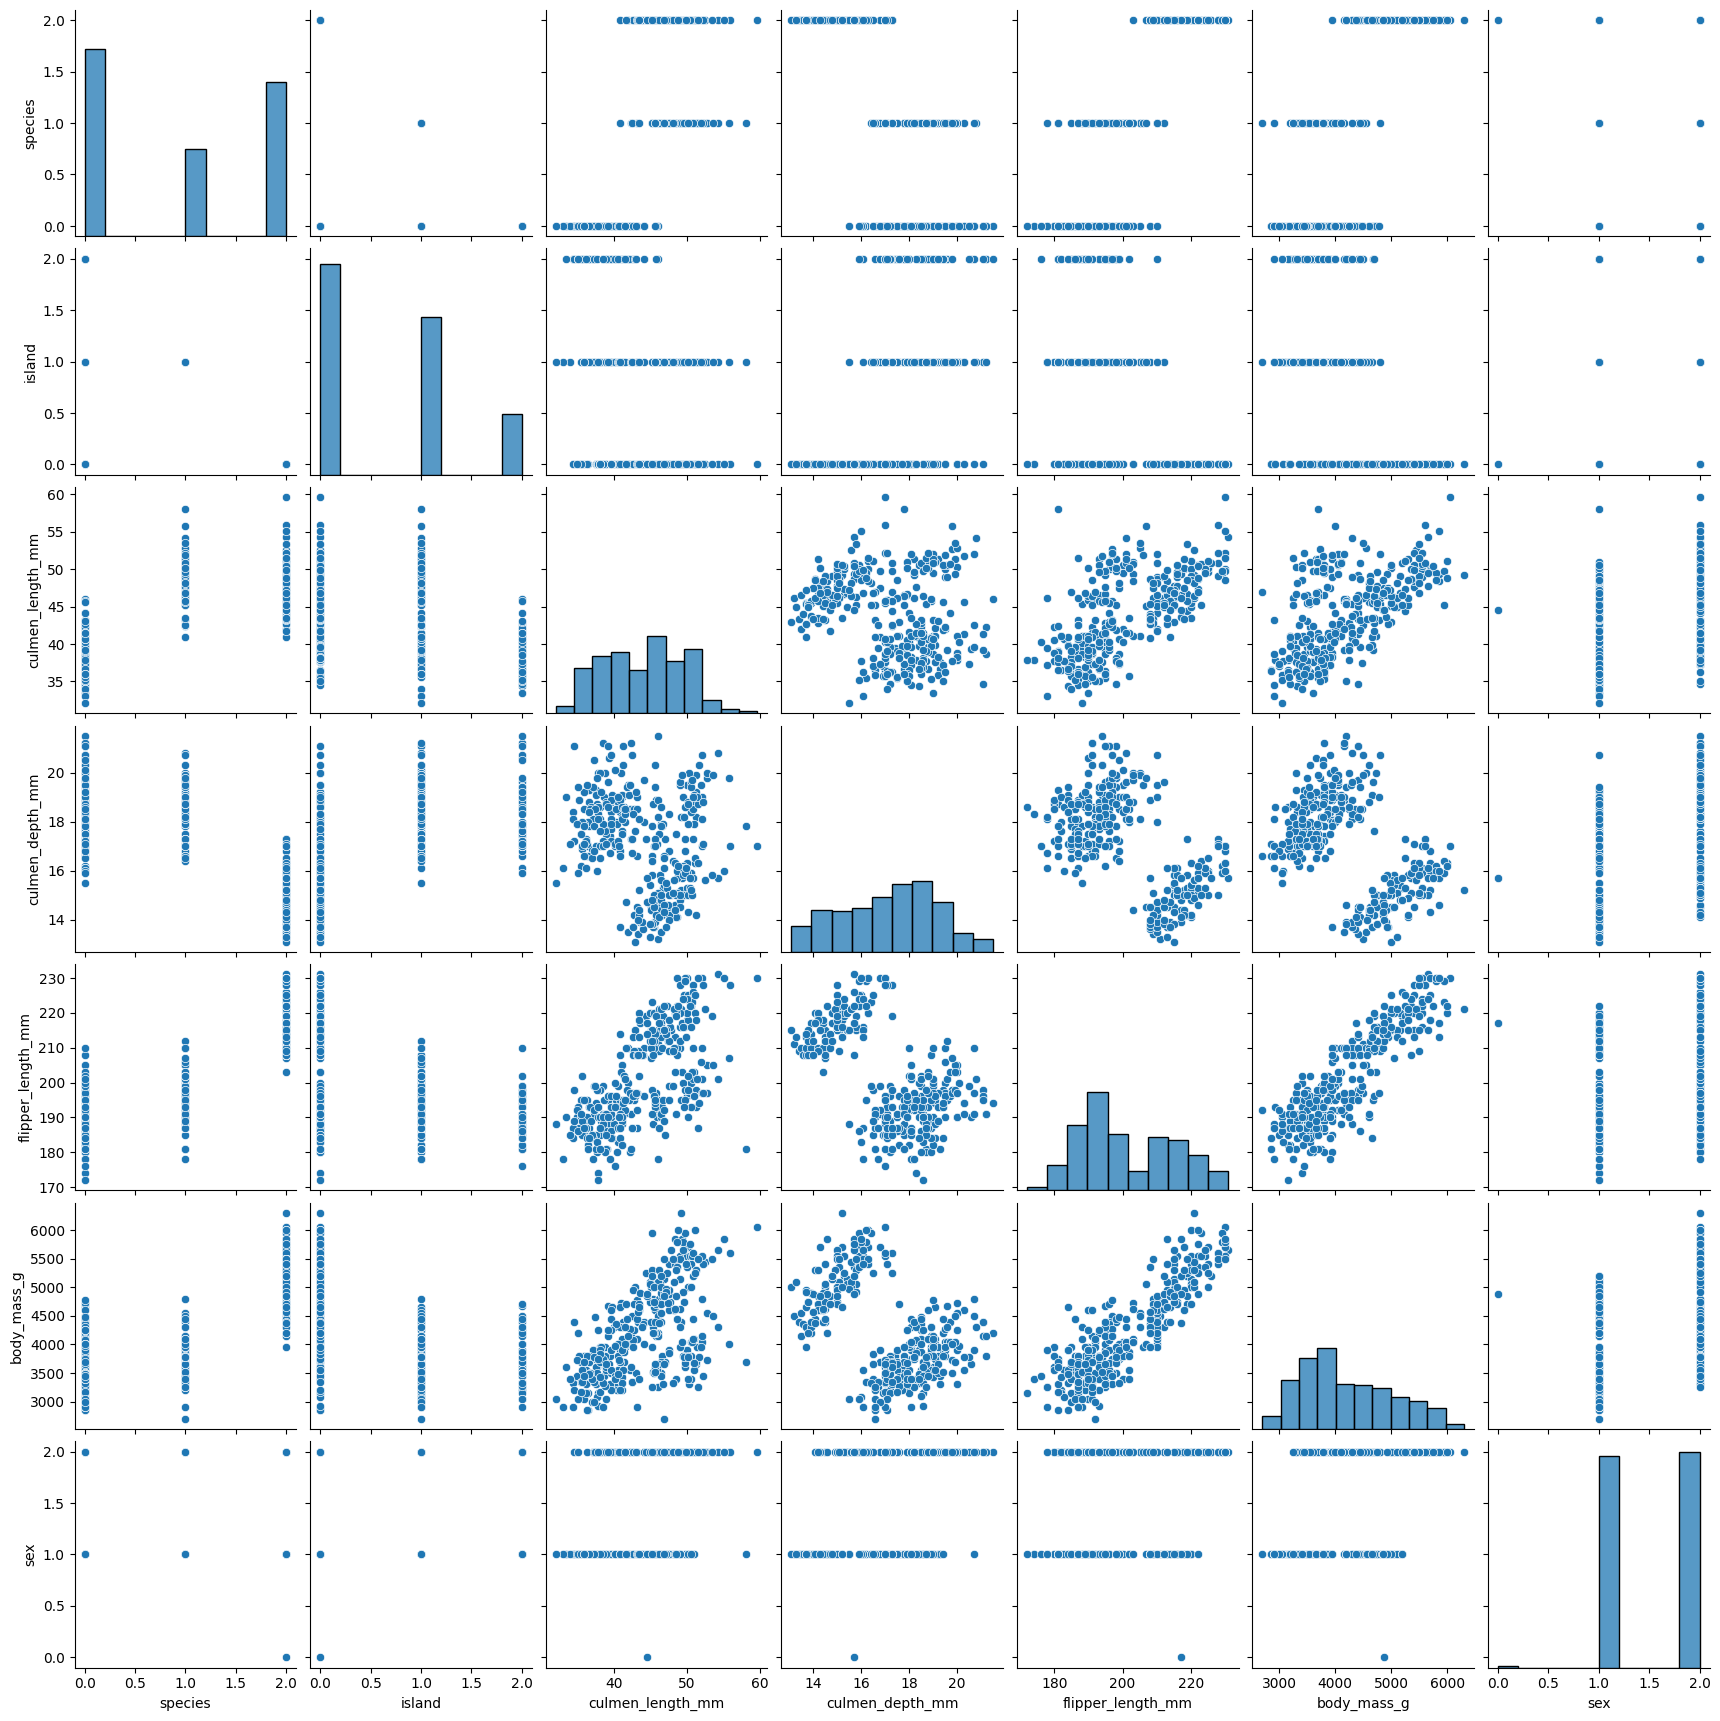

In [45]:
#3c
sns.pairplot(df)

In [20]:
#4
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [25]:
#5
missing_values = df.isnull().sum()
df.dropna(inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [55]:
#6
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# sns.boxplot(ax=axes[0, 0], data=df, x='culmen_length_mm')
# axes[0, 0].set_title('Culmen Length (mm)')
# sns.boxplot(ax=axes[0, 1], data=df, x='culmen_depth_mm')
# axes[0, 1].set_title('Culmen Depth (mm)')
# sns.boxplot(ax=axes[1, 0], data=df, x='flipper_length_mm')
# axes[1, 0].set_title('Flipper Length (mm)')
# sns.boxplot(ax=axes[1, 1], data=df, x='body_mass_g')
# axes[1, 1].set_title('Body Mass (g)')
# plt.tight_layout()
# plt.show()

Q1 = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.25)
Q3 = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = ((df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] < lower_limit) |
            (df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] > upper_limit)).any(axis=1)
df_no_outliers = df[~outliers]
df_no_outliers


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


In [22]:
#7
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


In [27]:
#8
categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:\n", categorical_columns)
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df



Categorical Columns:
 Index(['species', 'island', 'sex'], dtype='object')


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


In [33]:
# 9
X = df.drop("species", axis=1) #Indpendent
y = df["species"] #Dependent Variable species
print(X)
print(y)


     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0         2              39.1             18.7              181.0   
1         2              39.5             17.4              186.0   
2         2              40.3             18.0              195.0   
4         2              36.7             19.3              193.0   
5         2              39.3             20.6              190.0   
..      ...               ...              ...                ...   
338       0              47.2             13.7              214.0   
340       0              46.8             14.3              215.0   
341       0              50.4             15.7              222.0   
342       0              45.2             14.8              212.0   
343       0              49.9             16.1              213.0   

     body_mass_g  sex  
0         3750.0    2  
1         3800.0    1  
2         3250.0    1  
4         3450.0    1  
5         3650.0    2  
..           ...  ...  
338

In [37]:
#10
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.167273,0.738095,0.355932,0.208333,0.5
4,1.0,0.261818,0.892857,0.305085,0.263889,1.0


In [42]:
# 11
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 12
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (267, 6)
X_test shape: (67, 6)
y_train shape: (267,)
y_test shape: (67,)
